# UAC20 Audio Class Device Topology Plotting

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 
 
from universal_serial_bus import *
# from universal_serial_bus.orm import OrmClassBase #, ModelBuilder,
from usb_audio.orm import Topologen

## USB Codes and Descriptors

In [3]:
from universal_serial_bus.orm.usb20.descriptors import *
from universal_serial_bus.orm.usb20.codes import *

## UAC Descriptors

In [4]:
from usb_audio.orm.uac20.descriptors import *

In [5]:
# ModelBuilder.gen_all(db_url, True)

## UAC Format Type Descriptors

In [6]:
from usb_audio.orm.uac20.formats.descriptors import *

## Device

In [7]:
idVendor = 0x1b3f
idProduct = 0x2008

dev = USBdevice(vid = idVendor, pid = idProduct)
# print(dev)

## Device descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#DeviceDescriptors  

In [8]:
bmRequestType = usb.util.build_request_type(CONTROL_REQUEST.DIRECTION.IN, 
                                            CONTROL_REQUEST.TYPE.STANDARD, 
                                            CONTROL_REQUEST.RECIPIENT.DEVICE)

In [9]:
descriptor = dev.ctrl_transfer(bmRequestType = bmRequestType, 
                               bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                               wValue = DESCRIPTOR.TYPE.DEVICE << 8, 
                               wIndex = 0, 
                               data_or_wLength = DESCRIPTOR.SIZE.DEVICE)
descriptor

array('B', [18, 1, 16, 1, 0, 0, 0, 8, 63, 27, 8, 32, 0, 1, 1, 2, 0, 1])

## Configuration descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#ConfigurationDescriptors  

In [10]:
descriptor = dev.ctrl_transfer(bmRequestType = bmRequestType, 
                               bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                               wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                               wIndex = 0, 
                               data_or_wLength = DESCRIPTOR.SIZE.CONFIG)
descriptor

array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50])

### Host 再一次發送 GetDescriptor(Config類) 的請求
完整的長度 = wTotalLength

In [11]:
descriptor = dev.ctrl_transfer(bmRequestType = bmRequestType, 
                         bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                         wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                         wIndex = 0, 
                         data_or_wLength = descriptor[2])
# descriptor

## 所有的 descriptors

In [12]:
descriptors = list(OrmClassBase.split_descriptor(descriptor))
descriptors

[array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50]),
 array('B', [9, 4, 0, 0, 0, 1, 1, 0, 0]),
 array('B', [10, 36, 1, 0, 1, 100, 0, 2, 1, 2]),
 array('B', [12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0]),
 array('B', [12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0]),
 array('B', [9, 36, 3, 3, 1, 3, 0, 6, 0]),
 array('B', [9, 36, 3, 2, 1, 1, 0, 9, 0]),
 array('B', [7, 36, 5, 9, 1, 5, 0]),
 array('B', [10, 36, 6, 6, 8, 1, 1, 2, 2, 0]),
 array('B', [9, 36, 6, 5, 4, 1, 67, 0, 0]),
 array('B', [9, 36, 6, 7, 4, 1, 3, 0, 0]),
 array('B', [13, 36, 4, 8, 2, 1, 7, 2, 3, 0, 0, 0, 0]),
 array('B', [9, 4, 1, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 1, 1, 1, 1, 2, 0, 0]),
 array('B', [7, 36, 1, 1, 1, 1, 0]),
 array('B', [14, 36, 2, 1, 2, 2, 16, 2, 68, 172, 0, 128, 187, 0]),
 array('B', [9, 5, 5, 1, 192, 0, 1, 0, 0]),
 array('B', [7, 37, 1, 1, 0, 0, 0]),
 array('B', [9, 4, 2, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 2, 1, 1, 1, 2, 0, 0]),
 array('B', [7, 36, 1, 2, 1, 1, 0]),
 array('B', [14, 36, 2, 1, 1, 2, 16, 2, 68, 172, 0, 1

## 判斷 descriptors 的種類，並儲存到 db
- CS_INTERFACE
  - HEADER | CS_INTERFACE | Table 4-5: Class-Specific AC Interface Header Descriptor
  - CLOCK_SOURCE | CS_INTERFACE | Table 4-6: Clock Source Descriptor
  - CLOCK_SELECTOR | CS_INTERFACE | Table 4-7: Clock Selector Descriptor
  - CLOCK_MULTIPLIER | CS_INTERFACE | Table 4-8: Clock Multiplier Descriptor
  - INPUT_TERMINAL | CS_INTERFACE | Table 4-9: Input Terminal Descriptor
  - OUTPUT_TERMINAL | CS_INTERFACE | Table 4-10: Output Terminal Descriptor
  - MIXER_UNIT | CS_INTERFACE | Table 4-11: Mixer Unit Descriptor
  - SELECTOR_UNIT | CS_INTERFACE | Table 4-12: Selector Unit Descriptor
  - FEATURE_UNIT | CS_INTERFACE | Table 4-13: Feature Unit Descriptor
  - SAMPLE_RATE_CONVERTER | CS_INTERFACE | Table 4-14: Sampling Rate Converter Unit Descriptor
  - EFFECT_UNIT | CS_INTERFACE | Table 4-15: Common Part of the Effect Unit Descriptor
  - EFFECT_UNIT | CS_INTERFACE | Table 4-16: Parametric Equalizer Section Effect Unit Descriptor
  - EFFECT_UNIT | CS_INTERFACE | Table 4-17: Reverberation Effect Unit Descriptor
  - EFFECT_UNIT | CS_INTERFACE | Table 4-18: Modulation Delay Effect Unit Descriptor
  - EFFECT_UNIT | CS_INTERFACE | Table 4-19: Dynamic Range Compressor Effect Unit Descriptor
  - PROCESSING_UNIT | CS_INTERFACE | Table 4-20: Common Part of the Processing Unit Descriptor
  - PROCESSING_UNIT | CS_INTERFACE | Table 4-21: Up/Down-mix Processing Unit Descriptor
  - PROCESSING_UNIT | CS_INTERFACE | Table 4-22: Dolby Prologic Processing Unit Descriptor
  - PROCESSING_UNIT | CS_INTERFACE | Table 4-23: Stereo Extender Processing Unit Descriptor
  - EXTENSION_UNIT | CS_INTERFACE | Table 4-24: Extension Unit Descriptor
  - AS_GENERAL | CS_INTERFACE | Table 4-27: Class-Specific AS Interface Descriptor
  - ENCODER | CS_INTERFACE | Table 4-28: Encoder Descriptor
  - DECODER | CS_INTERFACE | Table 4-29: MPEG Decoder Descriptor
  - DECODER | CS_INTERFACE | Table 4-30: AC-3 Decoder Descriptor
  - DECODER | CS_INTERFACE | Table 4-31: WMA Decoder Descriptor
  - DECODER | CS_INTERFACE | Table 4-32: DTS Decoder Descriptor
- CS_ENDPOINT
  - EP_GENERAL | CS_ENDPOINT | Table 4-34: Class-Specific AS Isochronous Audio Data Endpoint Descriptor



In [13]:
def is_a(descpt, i, code):
    return OrmClassBase.int_eq_hex(descpt[i], code)

 
def get_descriptor_class(dscrpt, intf_type = None): 
    _class = None
    session = None
    session_usb = session_uac_descriptors = session_uac_format_descriptors  = None
         
    if is_a(dscrpt, 1, '02'):  # 如果是 config
        _class, session = StandardConfigurationDescriptor, session_usb        
     
    if is_a(dscrpt, 1, '05'):  # 如果是 endpoint
        _class, session = StandardEndpointDescriptor, session_usb
        
    if is_a(dscrpt, 1, '04'):  # 如果是 interface
        
        _class, session,  = StandardInterfaceDescriptor, session_usb
        
        if is_a(dscrpt, 5, '01'):  # 如果是 audio
            if is_a(dscrpt, 6, '01'):  # 如果是 AC interface
                intf_type =  "AC" 
            if is_a(dscrpt, 6, '02'):  # 如果是 AC interface
                intf_type =  "AS" 
                        
    if is_a(dscrpt, 1, '24'):  # 如果是 CS_INTERFACE
        session = session_uac_descriptors
        if intf_type == "AC":             
            _classes = {'00': None,
                        '01': ClassSpecificAcInterfaceHeaderDescriptor,
                        '02': InputTerminalDescriptor,
                        '03': OutputTerminalDescriptor,
                        '04': MixerUnitDescriptor,
                        '05': SelectorUnitDescriptor,
                        '06': FeatureUnitDescriptor,
                        '07': 'EFFECT_UNIT',
                        '08': 'PROCESSING_UNIT',
                        '09': ExtensionUnitDescriptor,
                        '0A': ClockSourceDescriptor,
                        '0B': ClockSelectorDescriptor,
                        '0C': ClockMultiplierDescriptor,
                        '0D': SamplingRateConverterUnitDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]            
            
        if intf_type == "AS":             
            _classes = {'00': None,
                        '01': ClassSpecificAsInterfaceDescriptor,
                        '02': TypeIFormatTypeDescriptor,
                        '03': EncoderDescriptor,
                        '04': 'DECODER'}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]            
            if code == '02': session = session_uac_format_descriptors

                        
    if is_a(dscrpt, 1, '25'):  # 如果是 CS_ENDPOINT
        session = session_uac_descriptors
        if intf_type == "AC":    
            pass
        
        if intf_type == "AS":             
            _classes = {'00': None,
                        '01': ClassSpecificAsIsochronousAudioDataEndpointDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]
            if code == '02': session = session_uac_format_descriptors
                
    return _class, session, intf_type 

In [14]:
dbos = []
intf_type = None
i = 0

for descriptor in descriptors:
    _class, session, intf_type = get_descriptor_class(descriptor, intf_type) 
    
    if _class is not None:
        dbo = _class.from_byte_array(descriptor)
        dbos.append(dbo)        

### Plotting tips
[draw_networkx_nodes](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html)  
[draw_networkx_edges](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html?highlight=draw_networkx_edges#)  
[arrow style](https://matplotlib.org/gallery/pyplots/whats_new_98_4_fancy.html#sphx-glr-gallery-pyplots-whats-new-98-4-fancy-py)  
[ConnectionStyle](https://matplotlib.org/api/_as_gen/matplotlib.patches.ConnectionStyle.html)  
[FancyArrowPatch](https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyArrowPatch.html)  

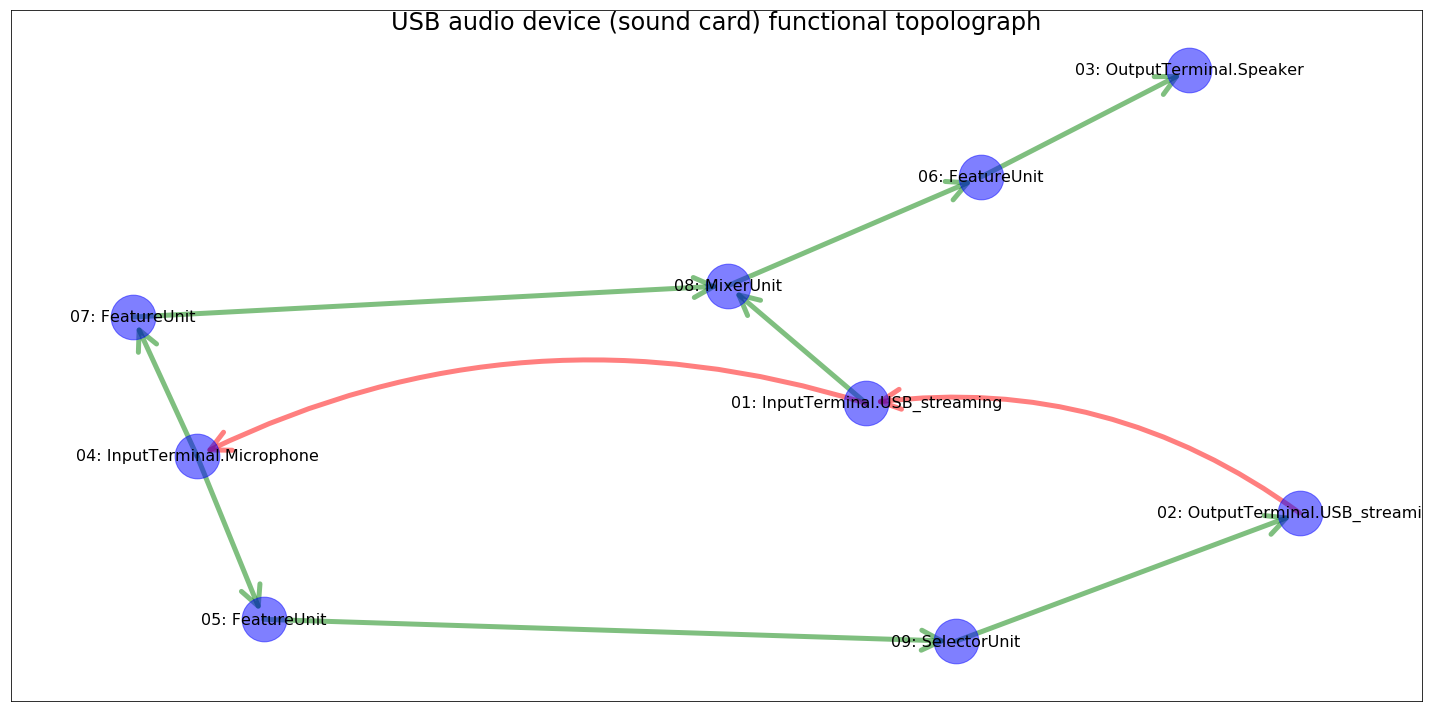

In [15]:
fig = plt.figure(figsize = (20, 10))

Topologen.draw_topolograph(dbos)# , label_font_size = 14, edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50,)

title = 'USB audio device (sound card) functional topolograph' #.title()
fig.suptitle(title, fontsize = 24)

plt.tight_layout()
plt.savefig(title + '.png')
plt.show()